In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [49]:
font = {'family':'serif', 'weight':'normal', 'size':16}
fontTitle = {'family':'serif', 'weight':'normal', 'size':20}

# Hamming window

## Hamming with a single-wide band

C:\Users\caior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\caior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Hamming window frequency')

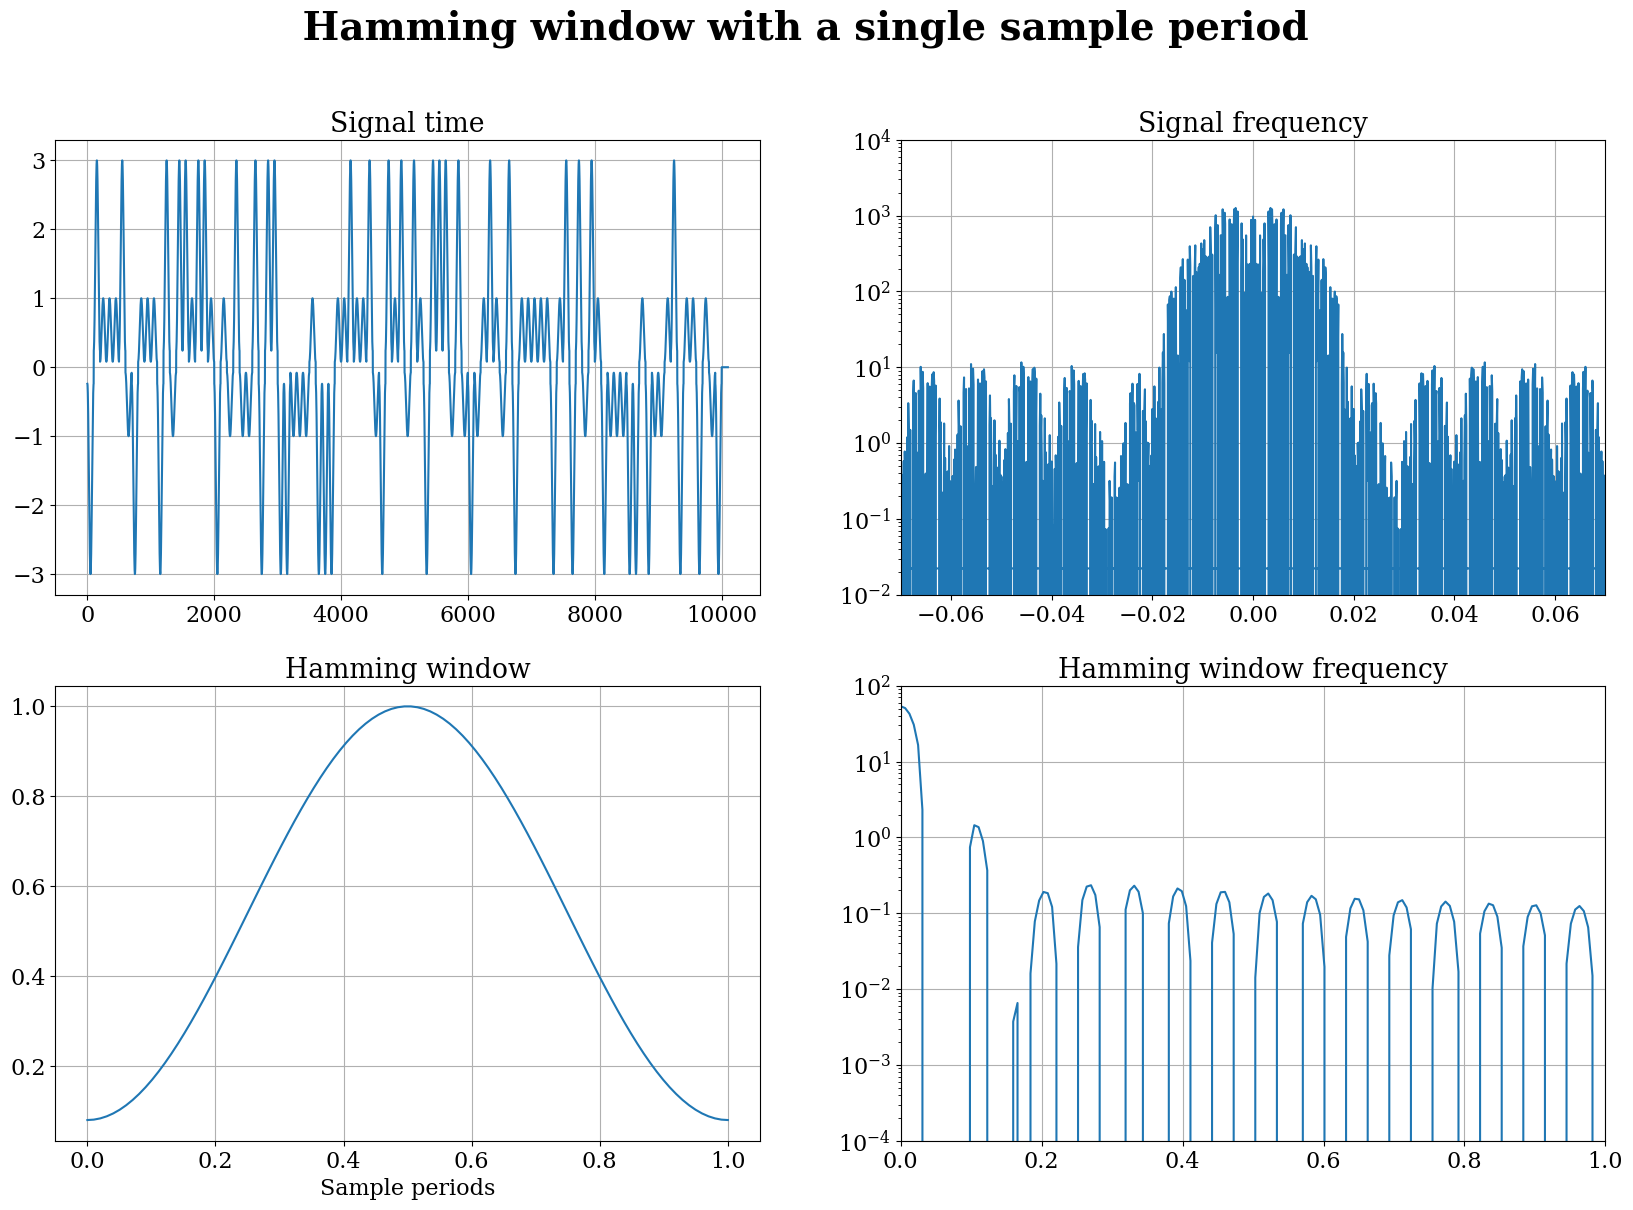

In [65]:
PtsNum = 100 # Number of points
M = 100 # Upsample by M
Constl = [-3,-1,1,3] # 4PAM Constellation

sig = np.zeros(PtsNum*M)
sig[::M] = np.random.choice(Constl,int(PtsNum))

hamSig = np.hamming(M)

sigConv = np.convolve(hamSig,sig)
figure, ax = plt.subplots(2,2,figsize=(20,13))
plt.rc('font',**font)
figure.suptitle(' Hamming window with a single sample period ',fontsize=28, weight='bold')
ax[0][0].grid(True)
ax[0][0].plot(sigConv)
ax[0][0].set_title('Signal time')

H = np.fft.fft(sigConv)
w = np.fft.fftfreq(len(sigConv))
ax[0][1].grid(True)
ax[0][1].plot(w,H)
ax[0][1].set_yscale('log')
ax[0][1].set_ylim(10e-3,10e3)
ax[0][1].set_xlim(-0.07,0.07)
ax[0][1].set_title('Signal frequency')

ax[1][0].grid(True)
ax[1][0].plot(np.linspace(0,int(len(hamSig)/M),len(hamSig)),hamSig)
ax[1][0].set_xlabel('Sample periods')
ax[1][0].set_title('Hamming window')

wm,Hm = signal.freqz(hamSig)
ax[1][1].grid(True)
ax[1][1].plot(wm,Hm)
ax[1][1].set_yscale('log')
ax[1][1].set_ylim(10e-5,100)
ax[1][1].set_xlim(0,1)
ax[1][1].set_title('Hamming window frequency')

## Hamming with double-wide band

Text(0.5, 1.0, 'Hamming window frequency')

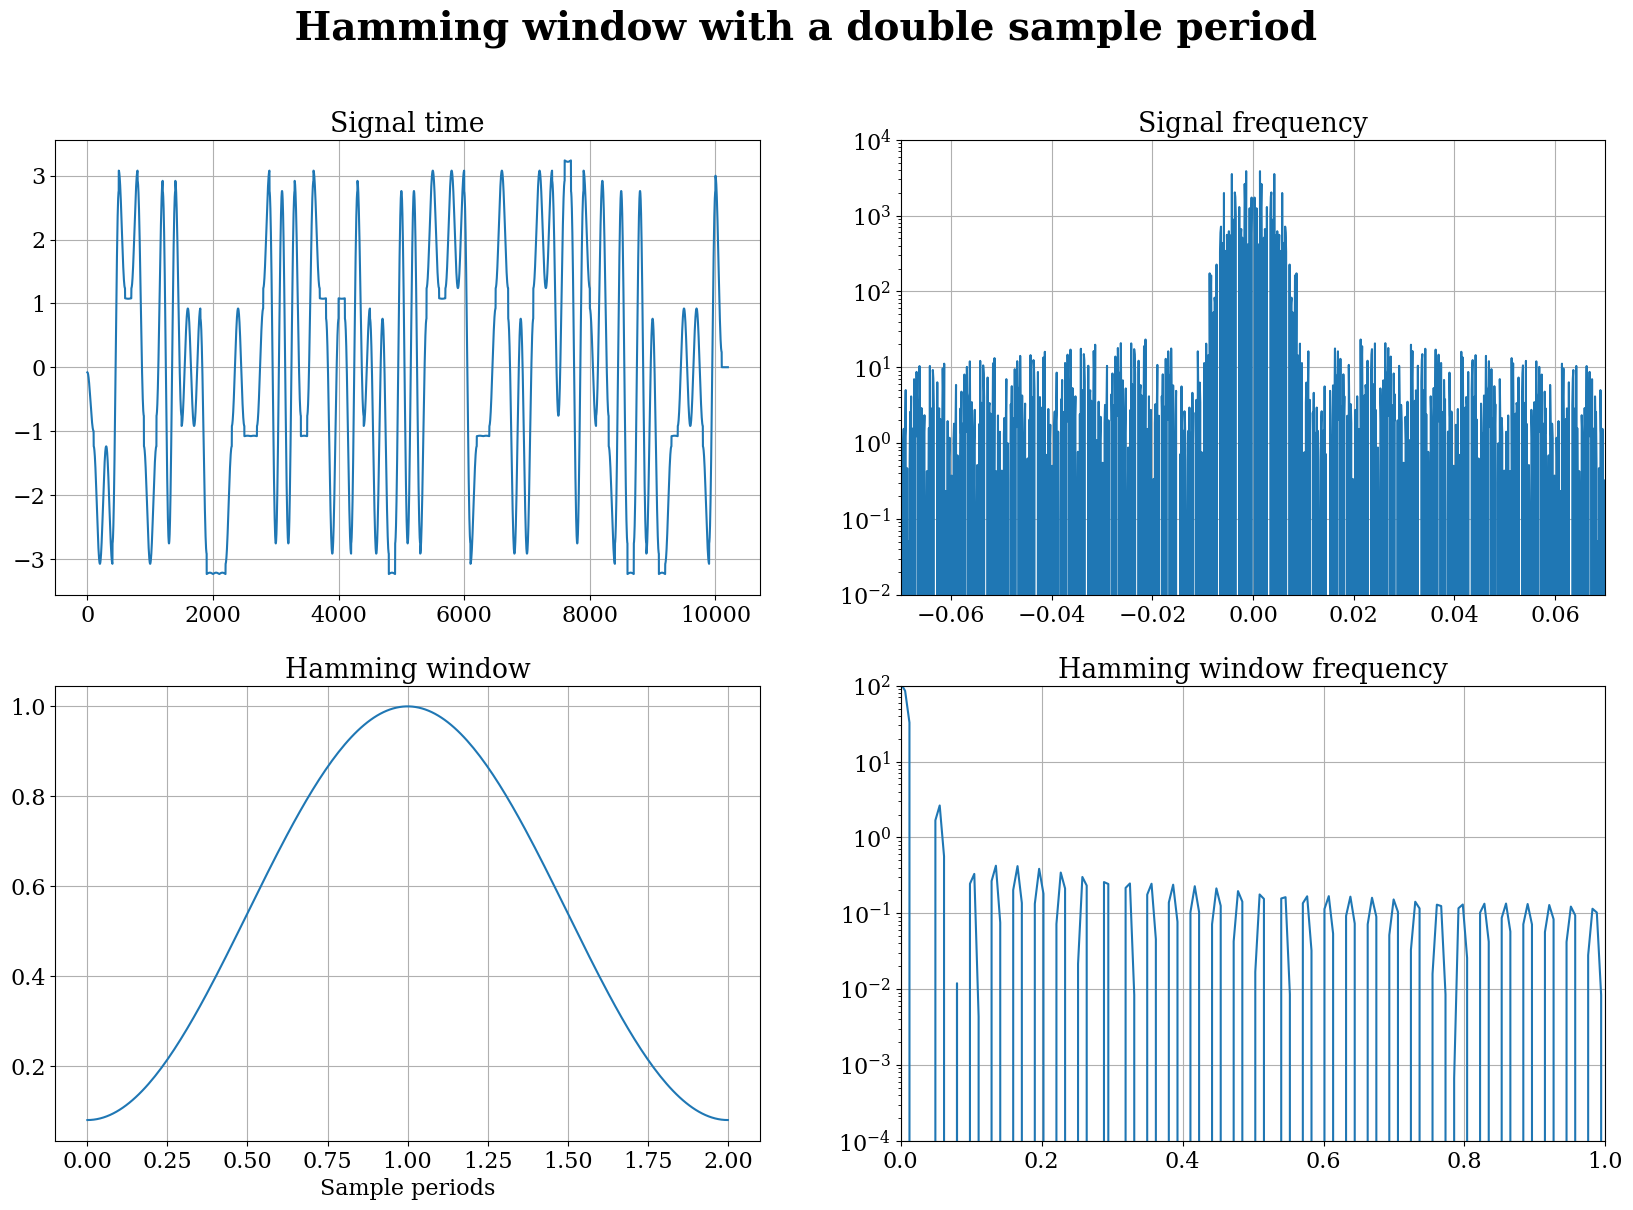

In [71]:
PtsNum = 100 # Number of points
M = 100 # Upsample by M
Constl = [-3,-1,1,3] # 4PAM Constellation

sig = np.zeros(PtsNum*M)
sig[::M] = np.random.choice(Constl,int(PtsNum))

hamSig = np.hamming(2*M)

sigConv = np.convolve(hamSig,sig)
figure, ax = plt.subplots(2,2,figsize=(20,13))
plt.rc('font',**font)
figure.suptitle(' Hamming window with a double sample period ',fontsize=28, weight='bold')
ax[0][0].grid(True)
ax[0][0].plot(sigConv)
ax[0][0].set_title('Signal time')

H = np.fft.fft(sigConv)
w = np.fft.fftfreq(len(sigConv))
ax[0][1].grid(True)
ax[0][1].plot(w,H)
ax[0][1].set_yscale('log')
ax[0][1].set_ylim(10e-3,10e3)
ax[0][1].set_xlim(-0.07,0.07)
ax[0][1].set_title('Signal frequency')

ax[1][0].grid(True)
ax[1][0].plot(np.linspace(0,int(len(hamSig)/M),len(hamSig)),hamSig)
ax[1][0].set_xlabel('Sample periods')
ax[1][0].set_title('Hamming window')

wm,Hm = signal.freqz(hamSig)
ax[1][1].grid(True)
ax[1][1].plot(wm,Hm)
ax[1][1].set_yscale('log')
ax[1][1].set_ylim(10e-5,100)
ax[1][1].set_xlim(0,1)
ax[1][1].set_title('Hamming window frequency')

## Hamming window sweep

In [77]:
PtsNum = 100 # Number of points
M = 100 # Upsample by M
Constl = [-3,-1,1,3] # 4PAM Constellation

sig = np.zeros(PtsNum*M)
sig[::M] = np.random.choice(Constl,int(PtsNum))

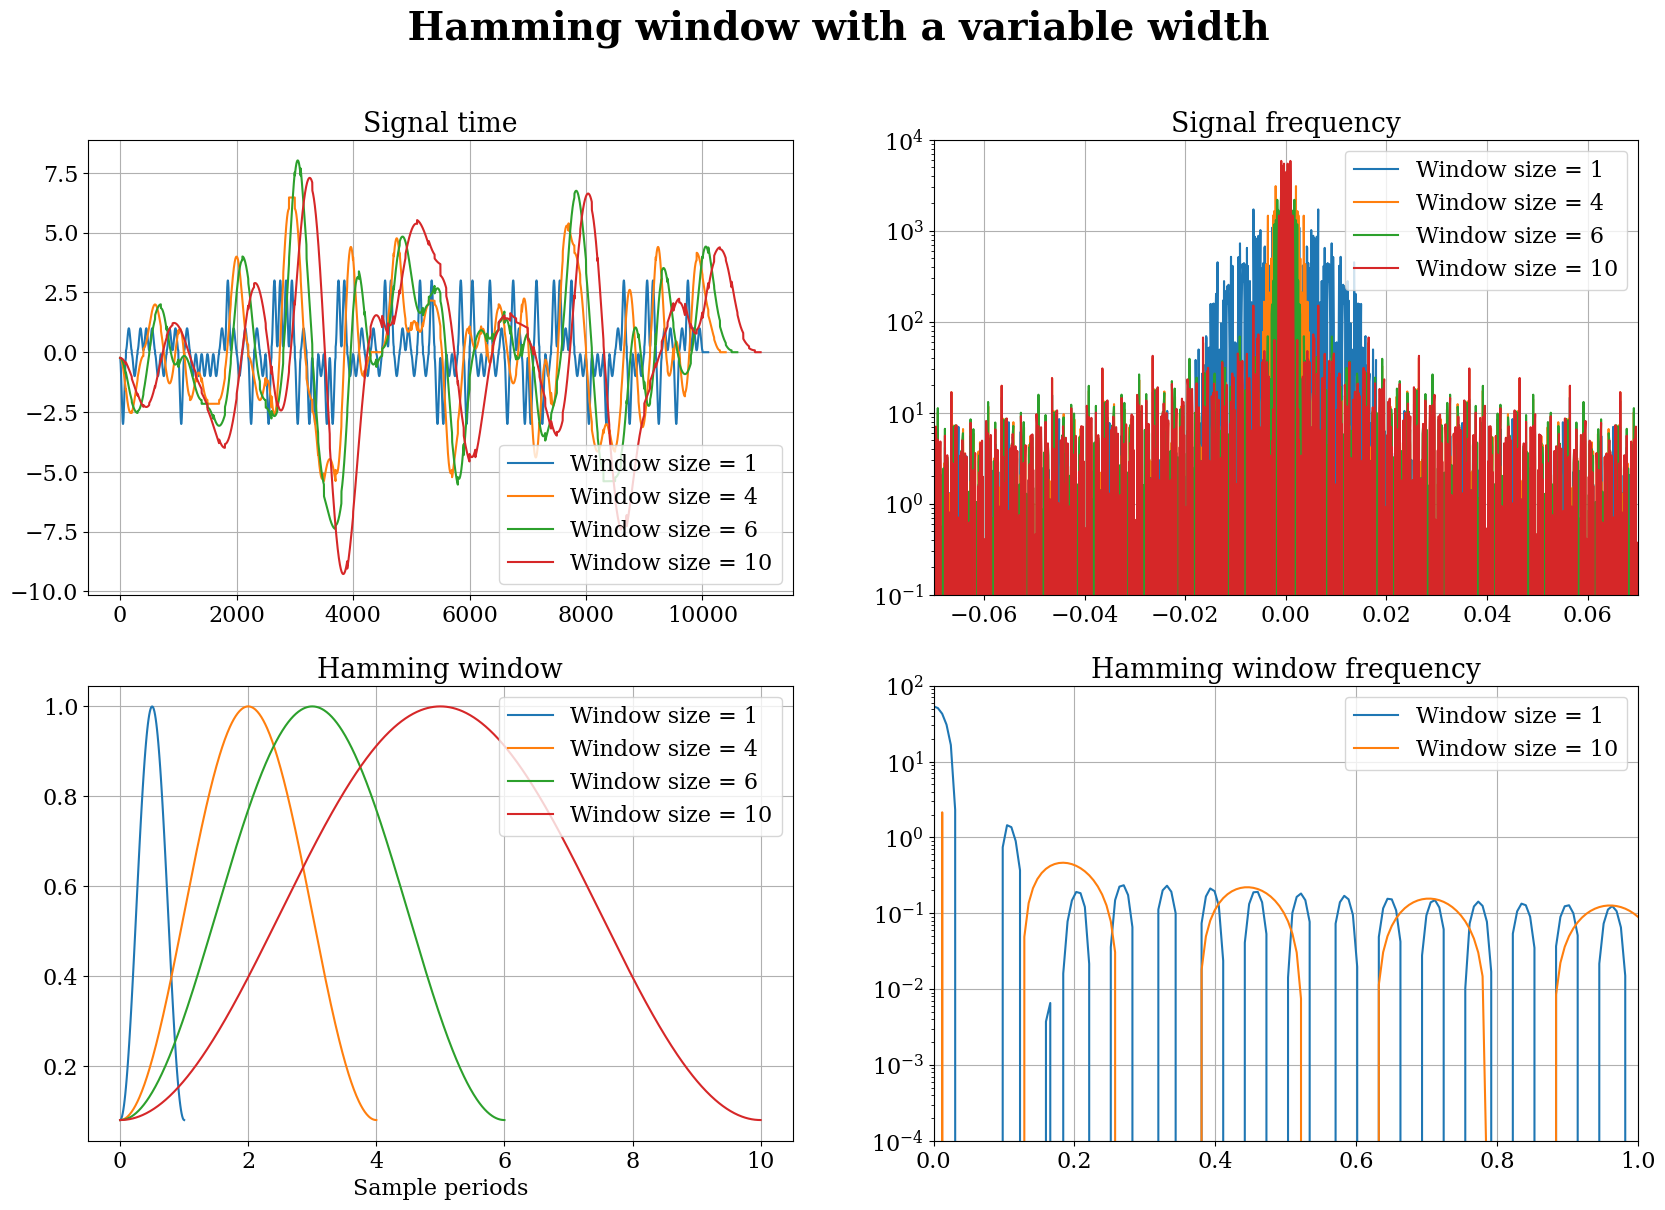

In [88]:
PeriodArray = [1,4,6,10]

figure, ax = plt.subplots(2,2,figsize=(20,13))
plt.rc('font',**font)

for i in range(len(PeriodArray)):
    hamSig = np.hamming(PeriodArray[i]*M)

    sigConv = np.convolve(hamSig,sig)
    figure.suptitle(' Hamming window with a variable width ',fontsize=28, weight='bold')
    ax[0][0].grid(True)
    ax[0][0].plot(sigConv, label='Window size = ' + str(PeriodArray[i]))
    ax[0][0].set_title('Signal time')
    ax[0][0].legend()

    H = np.fft.fft(sigConv)
    w = np.fft.fftfreq(len(sigConv))
    ax[0][1].grid(True)
    ax[0][1].plot(w,H, label='Window size = ' + str(PeriodArray[i]))
    ax[0][1].set_yscale('log')
    ax[0][1].set_ylim(10e-2,10e3)
    ax[0][1].set_xlim(-0.07,0.07)
    ax[0][1].set_title('Signal frequency')
    ax[0][1].legend()

    ax[1][0].grid(True)
    ax[1][0].plot(np.linspace(0,int(len(hamSig)/M),len(hamSig)),hamSig, label='Window size = ' + str(PeriodArray[i]))
    ax[1][0].set_xlabel('Sample periods')
    ax[1][0].set_title('Hamming window')
    ax[1][0].legend()

    if i==0 or i==3:
        wm,Hm = signal.freqz(hamSig)
        ax[1][1].grid(True)
        ax[1][1].plot(wm,Hm, label='Window size = ' + str(PeriodArray[i]))
        ax[1][1].set_yscale('log')
        ax[1][1].set_ylim(10e-5,100)
        ax[1][1].set_xlim(0,1)
        ax[1][1].set_title('Hamming window frequency')
        ax[1][1].legend()

# Raised cosine

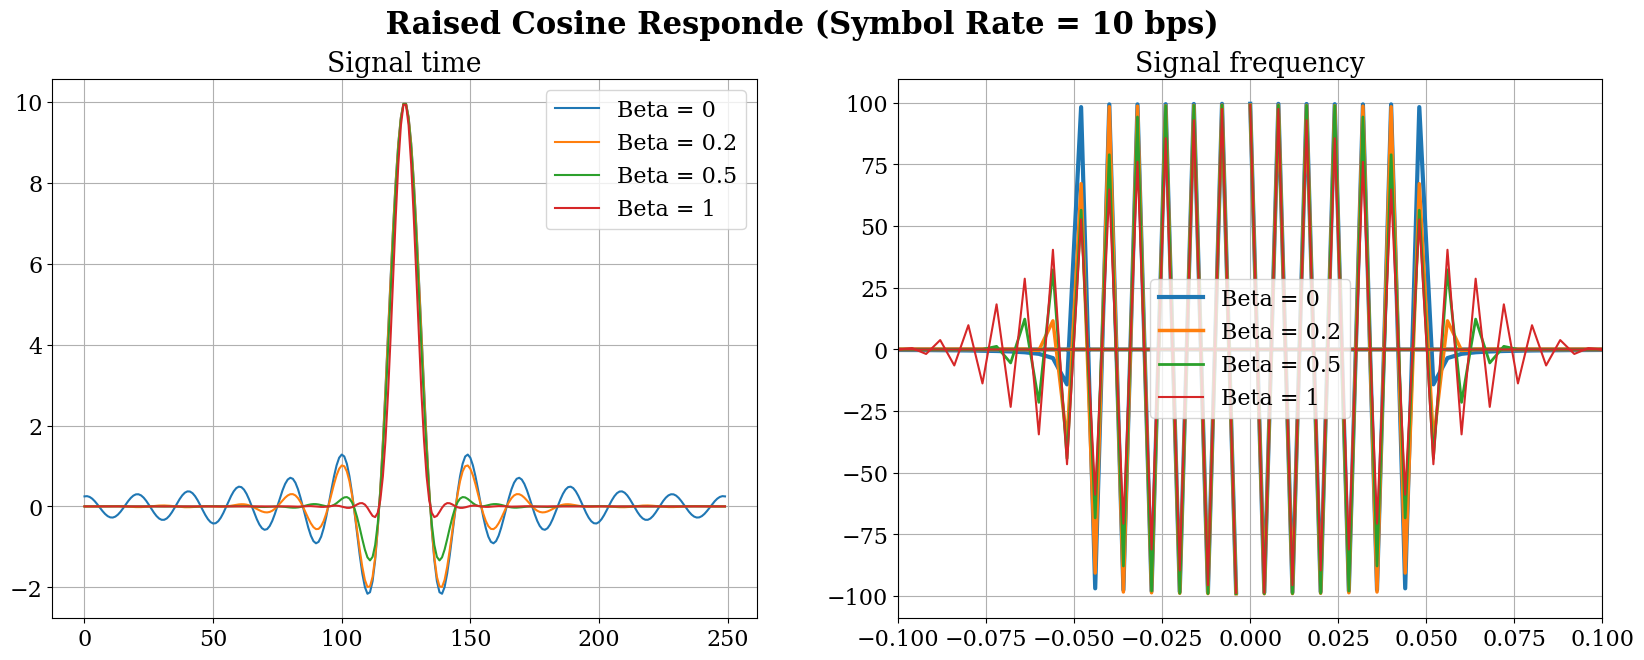

In [128]:
PtsNum = 250 # Number of points
SymbRate = 10 # Symbol rate

betaArray = [0,0.2,0.5,1]

figure, ax = plt.subplots(1,2,figsize=(20,7))
plt.rc('font',**font)
figure.suptitle(f' Raised Cosine Response (Symbol Rate = {SymbRate} bps) ',fontsize=22, weight='bold')

for i in range(len(betaArray)):
    beta = betaArray[i] # Rolloff factor

    f0 = SymbRate/2 # 6dB Bandwidth (Hz)
    fd = f0*beta
    f1 = f0-fd # Non-Atttenuation Bandwidth (Hz)

    tArray = np.linspace(-2*np.pi/f0,2*np.pi/f0,PtsNum)

    hRC = 2*f0 * (np.sin(2*np.pi*f0*tArray)/(2*np.pi*f0*tArray)) * (np.cos(2*np.pi*fd*tArray)/(1-(4*fd*tArray)**2))

    ax[0].plot(hRC, label='Beta = ' + str(betaArray[i]))
    ax[0].set_title('Signal time')
    ax[0].grid(True)
    ax[0].legend()

    H = np.fft.fft(hRC)
    w = np.fft.fftfreq(PtsNum)
    ax[1].grid(True)
    ax[1].plot(w,H, label='Beta = ' + str(betaArray[i]), linewidth = 3 - i/2)
    #ax[1].set_yscale('log')
    ax[1].set_xlim(-0.1,0.1)
    ax[1].set_title('Signal frequency')
    ax[1].legend()

[1 1 1 1 0 1 0 1 0 0]


C:\Users\caior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\caior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


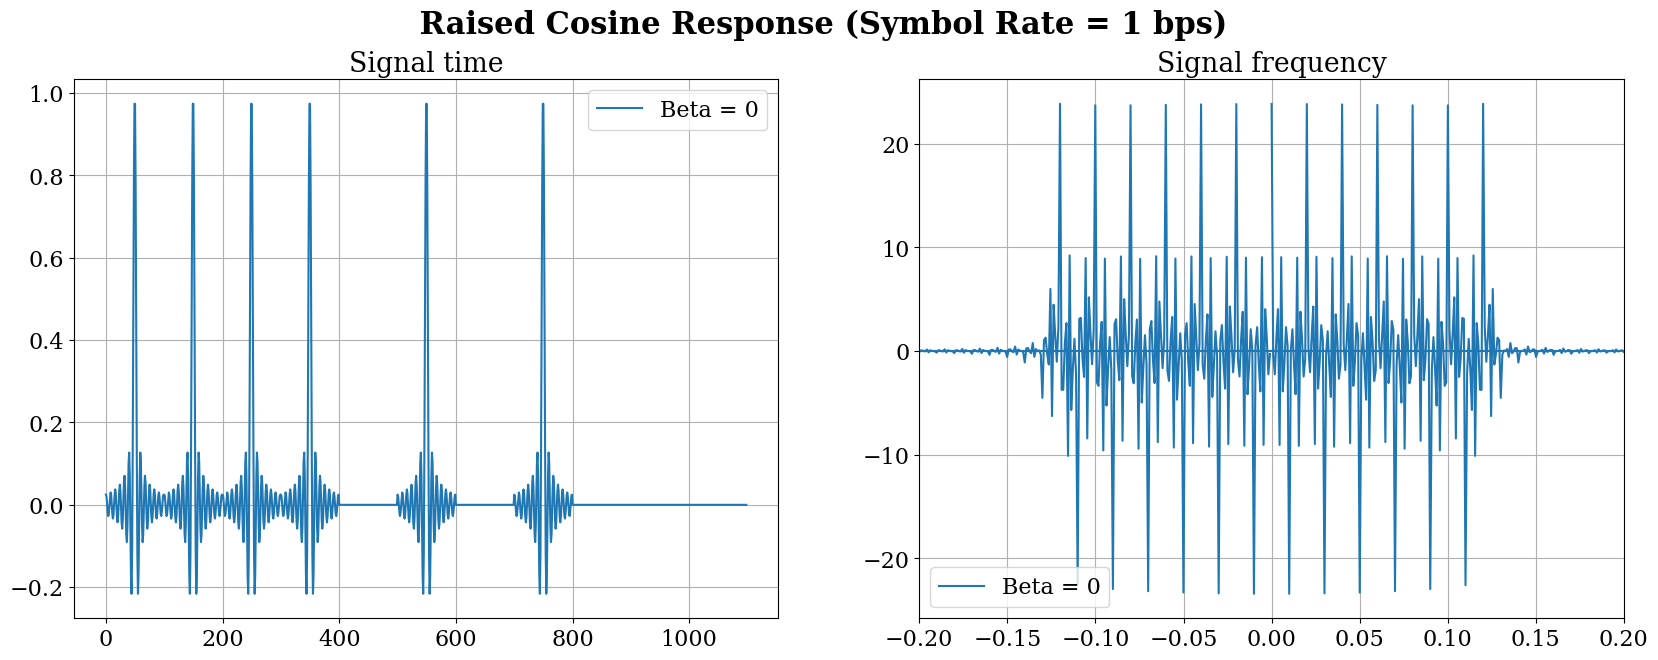

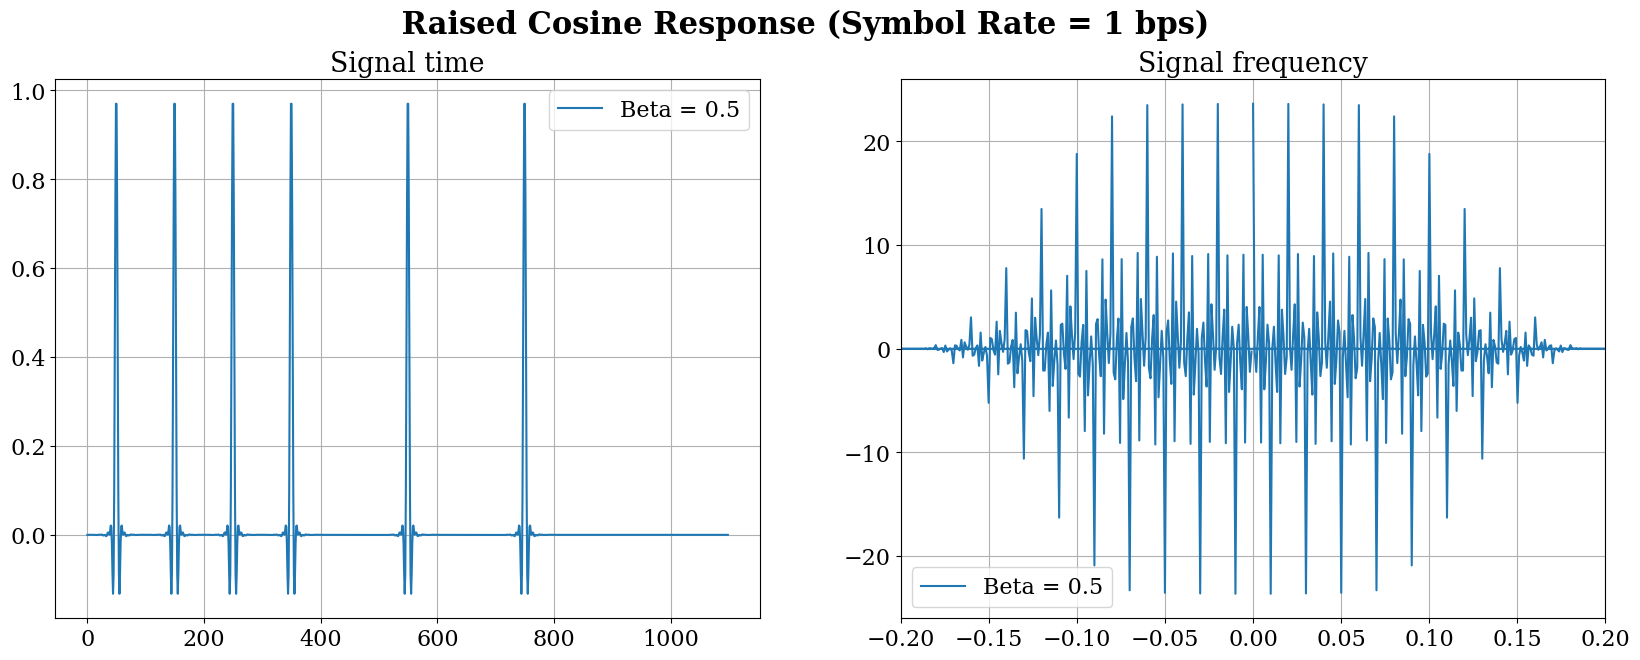

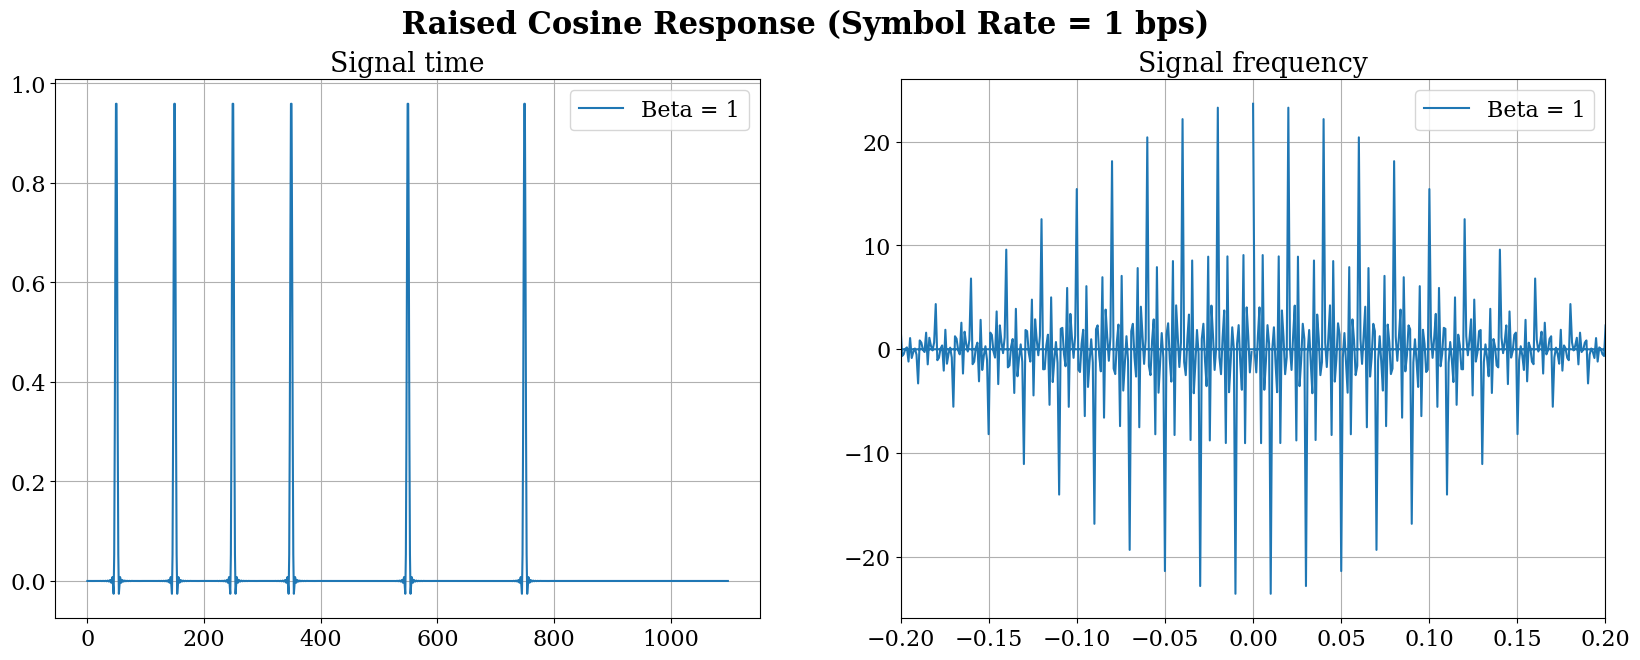

In [154]:
PtsNum = 10 # Number of points
M = 100 # Upsample by M
SymbRate = 1 # Symbol rate

betaArray = [0,0.5,1]

bitGen = np.random.randint(0,2,PtsNum)
print(bitGen)

sig = np.zeros(PtsNum*M)
sig[::M] = bitGen

for i in range(len(betaArray)):

    figure, ax = plt.subplots(1,2,figsize=(20,7))
    plt.rc('font',**font)
    figure.suptitle(f' Raised Cosine Response (Symbol Rate = {SymbRate} bps) ',fontsize=22, weight='bold')

    beta = betaArray[i] # Rolloff factor

    f0 = SymbRate/2 # 6dB Bandwidth (Hz)
    fd = f0*beta
    f1 = f0-fd # Non-Atttenuation Bandwidth (Hz)

    tArray = np.linspace(-2*np.pi/f0,2*np.pi/f0,M)

    hRC = 2*f0 * (np.sin(2*np.pi*f0*tArray)/(2*np.pi*f0*tArray)) * (np.cos(2*np.pi*fd*tArray)/(1-(4*fd*tArray)**2))

    sigConv = np.convolve(sig,hRC)

    ax[0].plot(sigConv, label='Beta = ' + str(betaArray[i]))
    ax[0].set_title('Signal time')
    ax[0].grid(True)
    ax[0].legend()

    H = np.fft.fft(sigConv)
    w = np.fft.fftfreq(len(sigConv))
    ax[1].grid(True)
    ax[1].plot(w,H, label='Beta = ' + str(betaArray[i]))
    #ax[1].set_yscale('log')
    ax[1].set_xlim(-0.2,0.2)
    ax[1].set_title('Signal frequency')
    ax[1].legend()